In [150]:
from diffusers import StableDiffusionPipeline
import torch
from diffusers.schedulers.scheduling_ddim import DDIMScheduler
from diffusers.schedulers.scheduling_ddpm import DDPMScheduler
from diffusers import LMSDiscreteScheduler, DDIMScheduler 
model_id = "/home/mila/a/aghajohm/scratch/milad-sd"

# scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000)
#scheduler = DDIMScheduler()
scheduler = DDPMScheduler()
pipe = StableDiffusionPipeline.from_pretrained(model_id, 
                                               torch_dtype=torch.float16,).to("cuda")

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [151]:
def dummy(images, **kwargs):
    return images, False
pipe.safety_checker = dummy

In [152]:
def seed_everything(seed: int):
    import random, os
    import numpy as np
    import torch
    
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    
seed_everything(42)

100%|███████████████████████████████████████████████████████████| 101/101 [00:09<00:00, 10.43it/s]


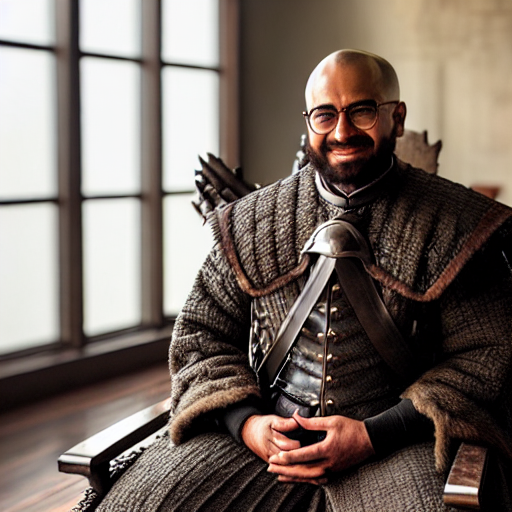

In [489]:
seed_everything(224)
#prompt = "portrait of beautiful young sks person, hand drawn pencil sketch, 4k"
#prompt = "beautiful bald young sks person jumping on trampoline, hand drawn pencil sketch, 4k"
#prompt = "epic professional digital art of sks person 👰 🐳 ⬛️ 🔜, best on artstation, breathtaking, epic, stunning, gorgeous, much detail, much wow, cgsociety, wlop, pixiv, behance, deviantart, masterpiece, UHD, 8K"
#prompt = "astronaut bald sks person walking on moon walking on moon walking on moon cute-fine-face, bold beard, open eyes, pretty face, realistic shaded Perfect face, fine details. Anime. realistic shaded lighting by Ilya Kuvshinov Giuseppe Dangelico Pino and Michael Garmash and Rob Rey, IAMAG premiere, WLOP matte print, cute freckles, masterpiece"
#prompt = "highly detailed portrait of bald sks person, stars shining in glasses, photographic realistic background, by jose torres, by royal jafarov, by dustin hobert, by joe fenton, by kaethe butcher, trending on instagram, award winning details "
#prompt = "close up of a handsome sks person ((adventurer)) (((archeologist))) wearing jeans and a white shirt with a scarf and a stetson hat in a ((Lush verdant jungle / oasis / desert island / temple ruin)), sensual, evocative pose, intricate, highly detailed"
#prompt = "portrait of bald sks person young spiderman handsome, male, masculine, upper body, red hair, long hair, d & d, fantasy, fierce, sharp features, intricate, elegant, highly detailed, digital painting, artstation, concept art, matte, sharp focus, illustration, art by artgerm and greg rutkowski and alphonse mucha "
#prompt = "sks person, god of the fire and power and stone, 30 years old, rugged, male, gorgeous, detailed face, amazing, thighs!!!!!!, flowers, muscular, intricate, highly detailed, digital painting, artstation, concept art, sharp focus, illustration, art by greg rutkowski and alphonse mucha"
#prompt = "sks person, drawn in blood, 30 years old, rugged, male, gorgeous, detailed face, amazing, thighs!!!!!!, flowers, muscular, intricate, highly detailed, digital painting, artstation, concept art, sharp focus, illustration, art by greg rutkowski and alphonse mucha"
#prompt = "sks person as bald James Bond with bubble eyes looking angrily at the camera, digital art by Artgerm and beeple and WLOP"
prompt = "“Very photorealistic portrait of sks person sitting on the Iron Throne from Game of Thrones, award-winning details”"
image = pipe(prompt, num_inference_steps=100, guidance_scale=8.5,
            negative_prompt="bad anatomy, bad proportions, blurry, cloned face, deformed, disfigured, duplicate, extra arms, extra fingers, extra limbs, extra legs, fused fingers, gross proportions, long neck, malformed limbs, missing arms, missing legs, mutated hands, mutation, mutilated, morbid, out of frame, poorly drawn hands, poorly drawn face, too many fingers, ugly",
            ).images[0]
image

In [485]:
image.save('milad43.jpg')